<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Bell_State_Physics_Gravity_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Install Qiskit and the Aer simulator
!pip install qiskit qiskit-aer pylatexenc

  Using cached qiskit-2.3.0-cp310-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.17.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=22be8dcf08f656baac457d14804274a0d63a8247c54267e58d6f7ffcbf2b4f73
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [3]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Circuit Diagram:


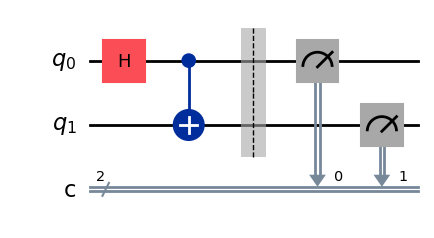


Results (Correlation check):
{'11': 994, '00': 1006}


In [4]:
# 2. Setup the "Wormhole" (Bell State)
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

# Step 1: Alice's superposition
qc.h(0)

# Step 2: Entanglement (The ER bridge)
qc.cx(0, 1)

qc.barrier()

# Step 3: Measurement
qc.measure([0,1], [0,1])

# 3. Draw the circuit
print("Circuit Diagram:")
display(qc.draw('mpl'))

# 4. Run simulation
sim = AerSimulator()
job = sim.run(qc, shots=2000)
result = job.result()
counts = result.get_counts()

print("\nResults (Correlation check):")
print(counts)

# 5. Plot results
plot_histogram(counts)
plt.show()

Teleportation Code

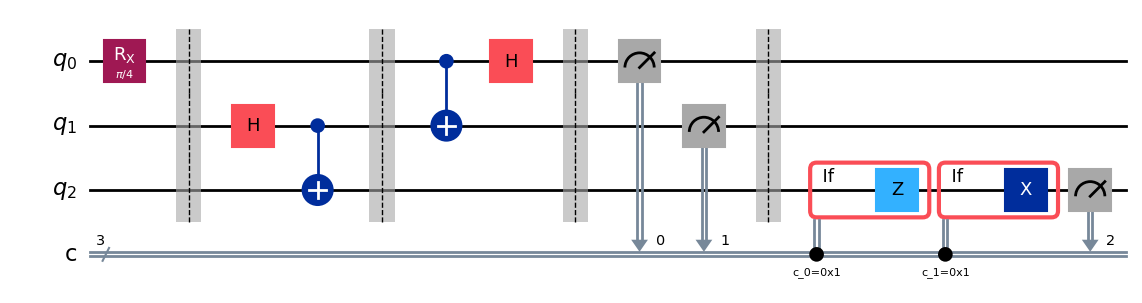

Results: {'110': 42, '100': 45, '101': 35, '001': 228, '111': 36, '011': 188, '000': 219, '010': 231}


In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np

# 1. Setup
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

# Step 1: Prepare Message (45-degree rotation)
qc.rx(np.pi/4, 0)
qc.barrier()

# Step 2: Create Entanglement (The Wormhole)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 3: Alice's Bell Measurement
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure([0, 1], [0, 1])
qc.barrier()

# Step 4: Bob's Conditional Fixes (Updated for Qiskit 1.0+)
with qc.if_test((cr[0], 1)):
    qc.z(2)
with qc.if_test((cr[1], 1)):
    qc.x(2)

# Step 5: Final Measurement
qc.measure(2, 2)

# Draw and Run
display(qc.draw('mpl'))
sim = AerSimulator()
counts = sim.run(qc, shots=1024).result().get_counts()
print("Results:", counts)

Maximal Entanglement

State of the system (before measurement collapse):


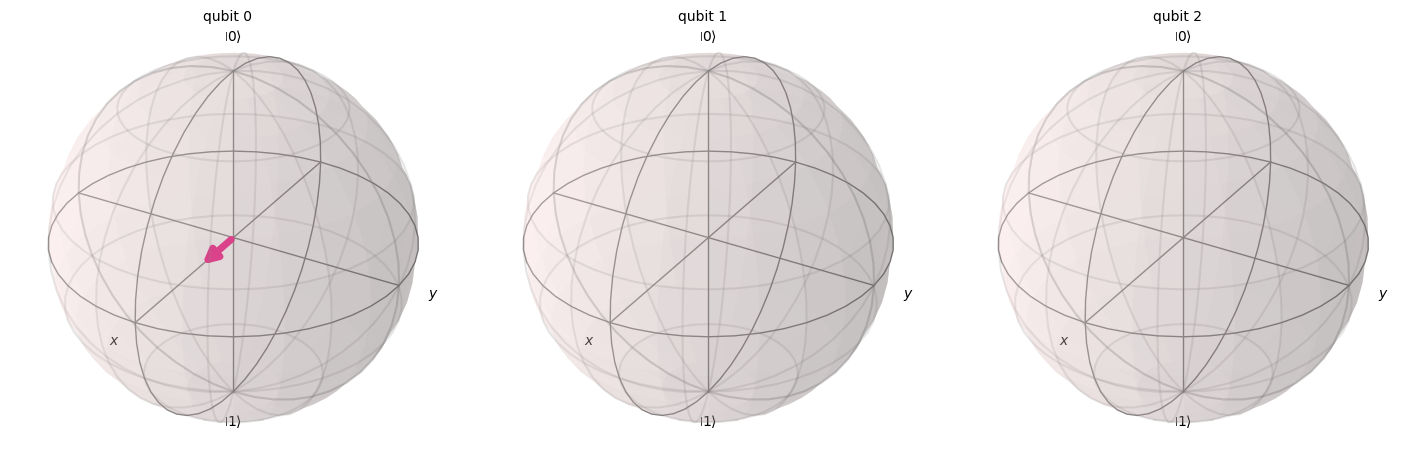

In [8]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# 1. Setup (No Classical Bits needed for pure math state)
qr = QuantumRegister(3, 'q')
qc = QuantumCircuit(qr)

# --- STEP 1: Alice's Secret State (The Message) ---
qc.rx(np.pi/3, 0)
qc.ry(np.pi/4, 0)
qc.barrier()

# --- STEP 2: The ER Bridge (Entanglement) ---
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# --- STEP 3: The Teleportation Interaction ---
qc.cx(0, 1)
qc.h(0)
# DO NOT MEASURE HERE - Measurement breaks the Statevector math!

# 2. Visualize the Statevector
# This shows the "Quantum Correlation" before it collapses
state = Statevector.from_instruction(qc)
print("State of the system (before measurement collapse):")
display(plot_bloch_multivector(state))

Wormhole Express

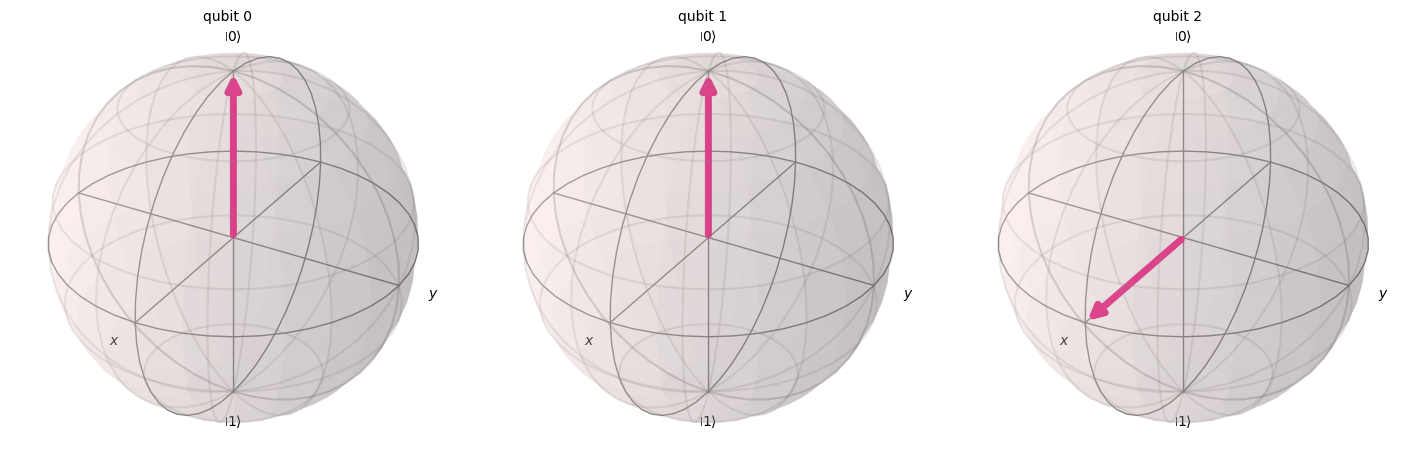

In [9]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# 1. Setup
qr = QuantumRegister(3, 'q')
qc = QuantumCircuit(qr)

# Step 1: Alice's Message (pointing right on the X-axis)
qc.h(0)
qc.barrier()

# Step 2: The Wormhole SWAP
# This moves the state from q0 -> q1 -> q2
qc.swap(0, 1)
qc.swap(1, 2)

# 2. Visualize
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))

Noisy Wormhole

In [11]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Create a Noise Model
noise_model = NoiseModel()

# Define a 1-qubit error (for 'h' gates)
error_1 = depolarizing_error(0.05, 1)
# Define a 2-qubit error (for 'cx' gates)
error_2 = depolarizing_error(0.1, 2)

# Add them separately to the model
noise_model.add_all_qubit_quantum_error(error_1, ["h"])
noise_model.add_all_qubit_quantum_error(error_2, ["cx"])

# 2. Build the original ER=EPR circuit
qc_noisy = QuantumCircuit(2, 2)
qc_noisy.h(0)
qc_noisy.cx(0, 1)
qc_noisy.barrier()
qc_noisy.measure([0, 1], [0, 1])

# 3. Run with Noise
sim = AerSimulator(noise_model=noise_model)
result = sim.run(qc_noisy, shots=2000).result()
counts = result.get_counts()

print("Noisy Results (The 'leaky' bridge):")
print(counts)
plot_histogram(counts)
plt.show()

Noisy Results (The 'leaky' bridge):
{'01': 52, '10': 57, '00': 948, '11': 943}


Superdense Coding

Superdense Coding Circuit for message: 11


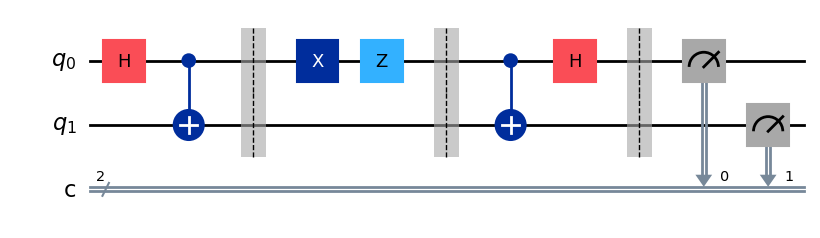


Bob's received counts (should be 100% '11'):
{'11': 1024}


In [13]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def superdense_coding(message="11"):
    """
    Simulates sending two classical bits using one qubit.
    message: A string of two bits ('00', '01', '10', '11')
    """
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)

    # --- STEP 1: Create Shared Entanglement (The ER Bridge) ---
    # Alice gets q0, Bob gets q1
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # --- STEP 2: Alice encodes her message into her qubit (q0) ---
    # Note: Qiskit reads strings right-to-left.
    # To match standard reading, we handle the string carefully.
    if message == "00":
        pass  # Do nothing
    elif message == "01":
        qc.x(0)
    elif message == "10":
        qc.z(0)
    elif message == "11":
        qc.x(0)
        qc.z(0)

    qc.barrier()

    # --- STEP 3: Alice sends q0 to Bob ---
    # Bob now performs the decoding on both qubits (q0 and q1)
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()

    # --- STEP 4: Measurement ---
    qc.measure([0, 1], [0, 1])

    return qc

# --- Execution ---
# You can change this to "00", "01", "10", or "11"
secret_message = "11"
circuit = superdense_coding(secret_message)

# Draw the circuit
print(f"Superdense Coding Circuit for message: {secret_message}")
display(circuit.draw('mpl'))

# Run simulation
sim = AerSimulator()
result = sim.run(circuit, shots=1024).result()
counts = result.get_counts()

print(f"\nBob's received counts (should be 100% '{secret_message}'):")
print(counts)

# Plot results
plot_histogram(counts)
plt.show()

Catch the Thief

In [14]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

def quantum_key_distribution(with_eve=True):
    # 1. Setup
    qr = QuantumRegister(1, 'q')
    cr_alice = ClassicalRegister(1, 'alice_bit')
    cr_bob = ClassicalRegister(1, 'bob_bit')
    qc = QuantumCircuit(qr, cr_alice, cr_bob)

    # --- STEP 1: Alice prepares a bit ---
    # Let's say Alice wants to send a '1'
    qc.x(0)
    # Alice chooses to send it in the DIAGONAL basis (H gate)
    qc.h(0)
    qc.barrier()

    # --- STEP 2: The Hacker (Eve) Intercepts ---
    if with_eve:
        # Eve measures in the wrong basis (Rectilinear) because she's guessing
        qc.measure(0, 0) # This "collapses" the quantum state
        qc.barrier()

    # --- STEP 3: Bob receives and measures ---
    # Bob measures in the correct basis (Diagonal)
    qc.h(0)
    qc.measure(0, 1)

    return qc

# Run the simulation
sim = AerSimulator()

# Scenario A: No Eavesdropper
qc_safe = quantum_key_distribution(with_eve=False)
res_safe = sim.run(qc_safe, shots=1).result().get_counts()

# Scenario B: With Eavesdropper
qc_eve = quantum_key_distribution(with_eve=True)
res_eve = sim.run(qc_eve, shots=1024).result().get_counts()

print("With NO Eve, Bob always gets the correct bit (1).")
print("With Eve, look at Bob's bit (the left-most digit):")
print(res_eve)

With NO Eve, Bob always gets the correct bit (1).
With Eve, look at Bob's bit (the left-most digit):
{'0 1': 280, '1 1': 250, '0 0': 269, '1 0': 225}


Quantum Bit Error Rate (QBER)

In [15]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def simulate_qkd_session(num_bits=100, eve_present=True):
    sim = AerSimulator()
    alice_key = []
    bob_key = []

    for i in range(num_bits):
        qc = QuantumCircuit(1, 2)

        # 1. Alice's Bit and Basis
        alice_bit = np.random.randint(2)
        alice_basis = np.random.randint(2) # 0=Rect, 1=Diag
        alice_key.append(alice_bit)

        if alice_bit == 1: qc.x(0)
        if alice_basis == 1: qc.h(0)

        # 2. Eve's Intervention
        if eve_present:
            eve_basis = np.random.randint(2)
            if eve_basis == 1: qc.h(0)
            qc.measure(0, 0) # Eve's sneaky peek
            if eve_basis == 1: qc.h(0) # Eve tries to "undo" her basis change

        # 3. Bob's Measurement
        bob_basis = np.random.randint(2)
        if bob_basis == 1: qc.h(0)
        qc.measure(0, 1)

        # Run and extract
        result = sim.run(qc, shots=1).result().get_counts()
        measured_bit = int(list(result.keys())[0][0])

        # 4. Sifting (Only keep bits where Alice and Bob used same basis)
        if alice_basis == bob_basis:
            bob_key.append(measured_bit)
        else:
            # We discard this bit because bases didn't match
            alice_key.pop()

    # Calculate Error Rate
    errors = sum(1 for a, b in zip(alice_key, bob_key) if a != b)
    error_rate = (errors / len(alice_key)) * 100 if alice_key else 0

    return alice_key, bob_key, error_rate

# Execute
a_key, b_key, err = simulate_qkd_session(num_bits=200, eve_present=True)

print(f"Alice's Sifted Key (First 10): {a_key[:10]}")
print(f"Bob's Sifted Key   (First 10): {b_key[:10]}")
print(f"\nDetected Error Rate: {err:.2f}%")

if err > 11:
    print("🚨 INTRUSION DETECTED! Eve is on the line. Abort communication.")
else:
    print("✅ Secure connection established.")

Alice's Sifted Key (First 10): [1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Bob's Sifted Key   (First 10): [1, 1, 0, 1, 1, 1, 0, 1, 0, 0]

Detected Error Rate: 27.03%
🚨 INTRUSION DETECTED! Eve is on the line. Abort communication.
